**Lab 03**: **Data Pre-processing (Text)**

- Arabic Sentiment Analysis Dataset:
https://arxiv.org/abs/2011.00578

#Imports

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#Read Data

In [ ]:
df = pd.read_csv("/content/sentiment_data.csv")

In [ ]:
df.head()

,text,sentiment
0,@nas_alharbi8 والله حسب الأرقام سيكون مخيب للآ...,Positive
1,"""الزعل بيغير ملامحك ، بيغير نظرة العين ، بيغير...",Neutral
2,الحب الحقيقي هو اقتسام بعض نفسك مع شخص أخر أقر...,Positive
3,@Mo_Fat7 النهضة في فتيل 😂,Positive
4,@halgawi @DmfMohe ليس حباً في ايران بقدر ماهو ...,Neutral


In [ ]:
df.sentiment.value_counts()

Neutral     37359
Positive     8821
Negative     8820
Name: sentiment, dtype: int64

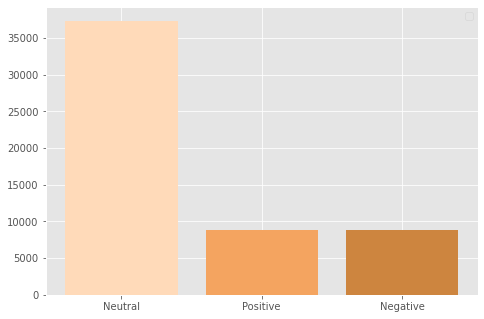

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Sentiments = ['Neutral', 'Positive', 'Negative']
values = list(df.sentiment.value_counts())
ax.bar(Sentiments,values,color = ['peachpuff','sandybrown','peru'],)
plt.show()

#Define The Preprocessing Class

In [ ]:
class Preprocessing:
  """
  A Preprocessor class that cleans and preprocesses text

  """

  def remove_punct(tweet):
    """
    takes an input text line and removes the punctuations from it.

    Args:
        tweet: input text string

    Returns:
        string: the preprocessed string after removing the punctuation
    """
    punct_pattern = r"[!\"\$%\'\(\)\*\+,\.:;\-<=·>?\[\\\]\^_ـ`{\|}~—٪’،؟`୍“؛”ۚ【»؛+«–…‘]"
    tweet = re.sub(punct_pattern,"",tweet)
    return tweet


  def remove_tashkeel(tweet):
    """
    takes an input text line and removes the tashkeel from it.

    Args:
        tweet: input text string
        
    Returns:
        string: the preprocessed string after removing the tashkeel
    """

    Tashkeel_pattern = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    tweet = re.sub(Tashkeel_pattern,"",tweet)
    return tweet


  def replacements(tweet):
    """
    takes an input text line and replace some patterns with tokens

    Args:
      tweet: input text string
      
    Returns:
      string: the preprocessed string after removing the patterns
    """

    user_mention_regex = r"@[\w]+"   # \w matches word characters. A word character is a character a-z, A-Z, 0-9, including _ (underscore)
    regex_email = r"\w+@\w+\.com"
    regex_phone_number = "\d{11}"    # \d digits from 0-9 , {} => means repeated exactly 11 times
    hashtag_regex = r"#[\w]+"

    tweet  = re.sub(user_mention_regex,"[مستخدم]",tweet)
    tweet  = re.sub(regex_email,"[بريد]",tweet)
    tweet  = re.sub(regex_phone_number,"[هاتف]",tweet)
    tweet  = re.sub(hashtag_regex,"[هاشتاج]",tweet)

    return tweet


  def normalize_tweets(tweet):
    """
    takes an input text line and normalize it.

    Args:
      tweet: input text string
      
    Returns:
      string: the preprocessed string after normalizing it
    """
    tweet = re.sub("[إأآا]", "ا", tweet)
    tweet = re.sub("ى", "ي", tweet)
    tweet = re.sub("ؤ", "ء", tweet)
    tweet = re.sub("ئ", "ء", tweet)
    tweet = re.sub("ة", "ه", tweet)
    tweet = re.sub("گ", "ك", tweet)
    return tweet

  def remove_newline(tweet):
    """
    takes an input text line and removes "\n".

    Args:
      tweet: input text string
      
    Returns:
      string: the preprocessed string after removing "\n"
    """
    tweet = re.sub("\n"," ",tweet)
    return tweet


#Test The Functions

In [ ]:
test_text = """لأول مره أفرح بدرجه في الكليه القمر ، اللي أنْا فيها 
دي فٌ الحمد لله! الحمد لله 01120330458 بجد 💕 💕 @DimaSadek
"""
print(test_text)

لأول مره أفرح بدرجه في الكليه القمر ، اللي أنْا فيها 
دي فٌ الحمد لله! الحمد لله 01120330458 بجد 💕 💕 @DimaSadek



In [ ]:
x = Preprocessing.remove_punct(test_text)
print(x)

لأول مره أفرح بدرجه في الكليه القمر  اللي أنْا فيها 
دي فٌ الحمد لله الحمد لله 01120330458 بجد 💕 💕 @DimaSadek



In [ ]:
y = Preprocessing.remove_tashkeel(x)
print(y)

لأول مره أفرح بدرجه في الكليه القمر  اللي أنا فيها 
دي ف الحمد لله الحمد لله 01120330458 بجد 💕 💕 @DimaSadek



In [ ]:
z = Preprocessing.normalize_tweets(y)
print(z)

لاول مره افرح بدرجه في الكليه القمر  اللي انا فيها 
دي ف الحمد لله الحمد لله 01120330458 بجد 💕 💕 @DimaSadek



In [ ]:
v = Preprocessing.replacements(z)
print(v)

لاول مره افرح بدرجه في الكليه القمر  اللي انا فيها 
دي ف الحمد لله الحمد لله [هاتف] بجد 💕 💕 [مستخدم]



In [ ]:
b = Preprocessing.remove_newline(v)
print(b)

لاول مره افرح بدرجه في الكليه القمر  اللي انا فيها  دي ف الحمد لله الحمد لله [هاتف] بجد 💕 💕 [مستخدم] 


#Apply Functions on the Dataframe

In [ ]:
df.text = df.text.apply(Preprocessing.remove_punct)
df.text = df.text.apply(Preprocessing.remove_tashkeel)
df.text = df.text.apply(Preprocessing.replacements)
df.text = df.text.apply(Preprocessing.normalize_tweets)
df.text = df.text.apply(Preprocessing.remove_newline)

In [ ]:
df

,text,sentiment
0,[مستخدم] والله حسب الارقام سيكون مخيب للامال و...,Positive
1,الزعل بيغير ملامحك بيغير نظره العين بيغير شك...,Neutral
2,الحب الحقيقي هو اقتسام بعض نفسك مع شخص اخر اقر...,Positive
3,[مستخدم] النهضه في فتيل 😂,Positive
4,[مستخدم] [مستخدم] ليس حبا في ايران بقدر ماهو ن...,Neutral
...,...,...
54996,[هاشتاج] بالامس تحدثونا عن الامانه واليوم يتم ...,Neutral
54997,[مستخدم] اتمني تحلون المشكله وش يعني لما نلغ...,Neutral
54998,[مستخدم] السلام عليكم عندي استفسار يا الغالي...,Neutral
54999,[مستخدم] حاب استفسر اذا منشاتي من ضمن المنشات ...,Neutral


#Lab Task
- Add a function to the previous class named **Remove_Emojis** which takes as an input a tweet and removes the emojis.